In [ ]:
# Install necessary libraries
!pip install pandas graphviz matplotlib

In [ ]:
!pip install seaborn


Customers Dataset Overview:

  CustomerID             Name                              Email  \
0       C001  Brandon Russell       grayanna@christian-moore.com   
1       C002  Ashley Williams        kristysmith@berry-baker.com   
2       C003     Kelly Barnes  jessicamiller@barrett-jackson.com   
3       C004  Alexandria Bell                  upatel@fowler.com   
4       C005       David Bell                 awalters@gmail.com   

          Phone    JoinDate    Status  
0  625310172753   4/19/2024    Active  
1  626456926248  11/28/2024  Inactive  
2  627525366896  11/05/2024    Active  
3  621026405552   6/13/2024  Inactive  
4  625494447349   4/22/2024  Inactive  

Customers Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  100 non-null    object
 1   Name        100 non-null    object
 2   Email       100 non-null    object
 

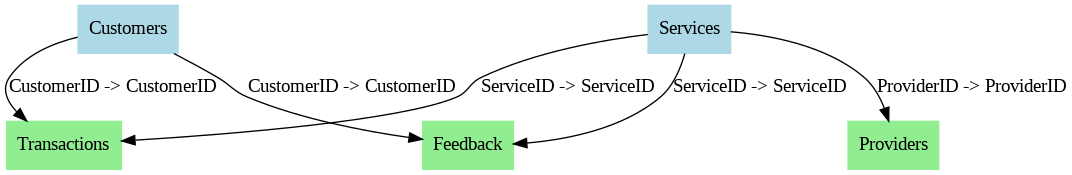

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from graphviz import Digraph
import seaborn as sns

# Load datasets
customers_df = pd.read_csv("/content/Dataset Takel - Customers.csv")
service_df = pd.read_csv("/content/Dataset Takel - Service.csv")
provider_df = pd.read_csv("/content/Dataset Takel - Provider.csv")
feedback_df = pd.read_csv("/content/Dataset Takel - Feedback.csv")
transaction_df = pd.read_csv("/content/Dataset Takel - Transaction.csv")

# Quick inspection of datasets and check for null values
def inspect_dataframes():
    dataframes = {
        "Customers": customers_df,
        "Services": service_df,
        "Providers": provider_df,
        "Feedback": feedback_df,
        "Transactions": transaction_df
    }

    for name, df in dataframes.items():
        print(f"\n{name} Dataset Overview:\n")
        print(df.head())
        print(f"\n{name} Info:")
        print(df.info())
        print(f"\n{name} Null Values:\n{df.isnull().sum()}")
        print(f"\n{name} Unique Value Counts:\n{df.nunique()}")
        print(f"\n{name} Statistical Overview:\n{df.describe(include='all')}\n")

inspect_dataframes()

# Define relationships between tables
relationships = [
    ("Customers", "CustomerID", "Transactions", "CustomerID"),
    ("Services", "ServiceID", "Transactions", "ServiceID"),
    ("Customers", "CustomerID", "Feedback", "CustomerID"),
    ("Services", "ServiceID", "Feedback", "ServiceID"),
    ("Services", "ProviderID", "Providers", "ProviderID")
]

# Create a function to visualize data lineage
def visualize_data_lineage(relationships):
    dot = Digraph(format='png', engine='dot')

    # Add nodes and edges based on relationships
    for source_table, source_key, target_table, target_key in relationships:
        dot.node(source_table, source_table, shape='box', style='filled', color='lightblue')
        dot.node(target_table, target_table, shape='box', style='filled', color='lightgreen')
        dot.edge(source_table, target_table, label=f"{source_key} -> {target_key}", color='black')

    # Save and display the graph
    dot.render(filename="data_lineage", cleanup=True)
    return dot

# Generate and visualize the data lineage diagram
lineage_diagram = visualize_data_lineage(relationships)

# Display the lineage diagram in the notebook
from IPython.display import Image
Image(filename="data_lineage.png")


Missing CustomerIDs in Transactions:
 Empty DataFrame
Columns: [TransactionID, CustomerID, ServiceID, Amount, Date, Status]
Index: []
Missing CustomerIDs in Feedback:
 Empty DataFrame
Columns: [FeedbackID, CustomerID, ServiceID, Rating, Comment, Date]
Index: []


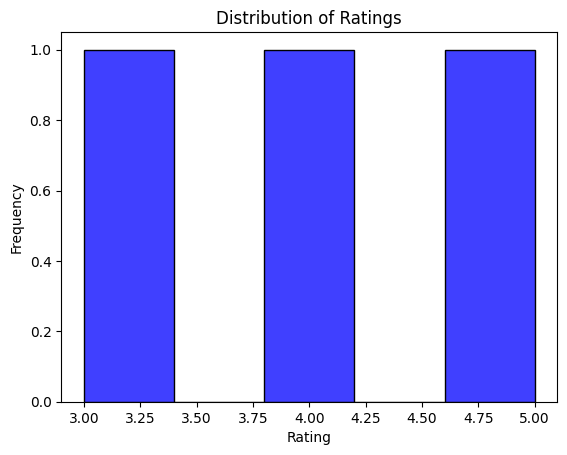

In [ ]:
# Contoh data untuk testing
customers_df = pd.DataFrame({
    "CustomerID": ["C001", "C002", "C003"],
    "Name": ["Alice", "Bob", "Charlie"],
    "JoinDate": ["2022-01-01", "2022-02-01", "2022-03-01"]
})

service_df = pd.DataFrame({
    "ServiceID": ["S001", "S002", "S003", "S004", "S005"],
    "Name": ["Basic Subscription", "Premium Plan", "Pay-as-You-Go", "Family Plan", "Annual Plan"],
    "Price": ["Rp50.000,00", "Rp100.000,00", "Rp75.000,00", "Rp150.000,00", "Rp500.000,00"],
    "ProviderID": ["P001", "P002", "P003", "P001", "P002"]
})

transaction_df = pd.DataFrame({
    "TransactionID": ["T001", "T002", "T003"],
    "CustomerID": ["C001", "C002", "C003"],
    "ServiceID": ["S001", "S002", "S003"],
    "Amount": ["Rp50000", "Rp100000", "Rp75000"],
    "Date": ["2022-01-15", "2022-02-15", "2022-03-15"],
    "Status": ["Completed", "Pending", "Completed"]
})

feedback_df = pd.DataFrame({
    "FeedbackID": ["F001", "F002", "F003"],
    "CustomerID": ["C001", "C002", "C003"],
    "ServiceID": ["S001", "S002", "S003"],
    "Rating": [5, 3, 4],
    "Comment": ["Good", "Average", "Great"],
    "Date": ["2022-01-16", "2022-02-16", "2022-03-16"]
})

# Step 1: Data Preprocessing
def preprocess_data():
    # Convert date columns to datetime format
    for df, col in zip([customers_df, feedback_df, transaction_df], ['JoinDate', 'Date', 'Date']):
        df[col] = pd.to_datetime(df[col], errors='coerce')

    # Clean Amount column in transaction_df
    transaction_df['Amount'] = transaction_df['Amount'].replace(
        {'Rp': '', ',': '', '.': ''}, regex=True)  # Remove currency symbols and formatting
    transaction_df['Amount'] = pd.to_numeric(transaction_df['Amount'], errors='coerce')  # Convert to numeric

    # Handle missing or invalid values in Amount
    transaction_df.dropna(subset=['Amount'], inplace=True)  # Remove rows with invalid Amount values

    # Drop duplicates
    for df in [customers_df, service_df, transaction_df, feedback_df]:
        df.drop_duplicates(inplace=True)

preprocess_data()


# Step 2: Validate Relationships
def validate_relationships():
    missing_transactions = transaction_df[~transaction_df['CustomerID'].isin(customers_df['CustomerID'])]
    missing_feedback = feedback_df[~feedback_df['CustomerID'].isin(customers_df['CustomerID'])]

    print("Missing CustomerIDs in Transactions:\n", missing_transactions)
    print("Missing CustomerIDs in Feedback:\n", missing_feedback)

validate_relationships()

# Step 3: Data Lineage Visualization
def visualize_data_lineage():
    relationships = [
        ("Customers", "CustomerID", "Transactions", "CustomerID"),
        ("Services", "ServiceID", "Transactions", "ServiceID"),
        ("Customers", "CustomerID", "Feedback", "CustomerID"),
        ("Services", "ServiceID", "Feedback", "ServiceID"),
        ("Services", "ProviderID", "Providers", "ProviderID")
    ]

    dot = Digraph(format='png', engine='dot')
    for source, source_key, target, target_key in relationships:
        dot.node(source, source, shape='box', style='filled', color='lightblue')
        dot.node(target, target, shape='box', style='filled', color='lightgreen')
        dot.edge(source, target, label=f"{source_key} -> {target_key}", color='black')

    dot.render(filename="data_lineage", cleanup=True)
    return dot

lineage_diagram = visualize_data_lineage()

# Step 4: Additional Visualizations
def additional_visualizations():
    # Example 1: Distribution of Ratings in Feedback
    if not feedback_df.empty:
        sns.histplot(feedback_df['Rating'], bins=5, kde=False, color='blue')
        plt.title("Distribution of Ratings")
        plt.xlabel("Rating")
        plt.ylabel("Frequency")
        plt.show()
    else:
        print("Feedback data is empty, skipping ratings distribution visualization.")

additional_visualizations()

<ipython-input-8-85f74c34153f>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Rating', data=service_rating, palette='coolwarm')


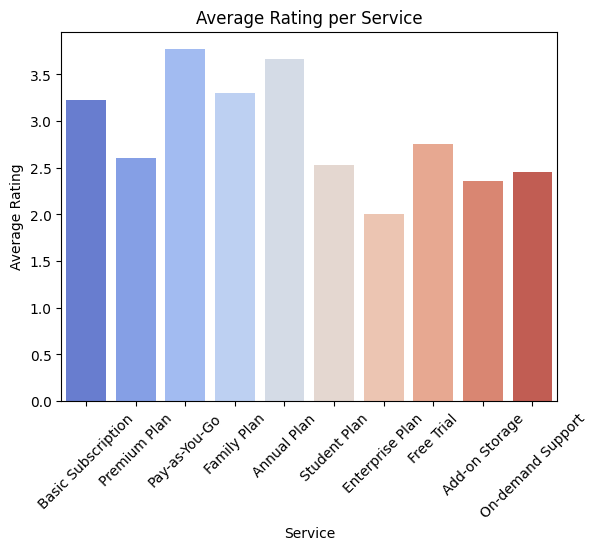

<ipython-input-8-85f74c34153f>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=feedback_df, palette='Set2')


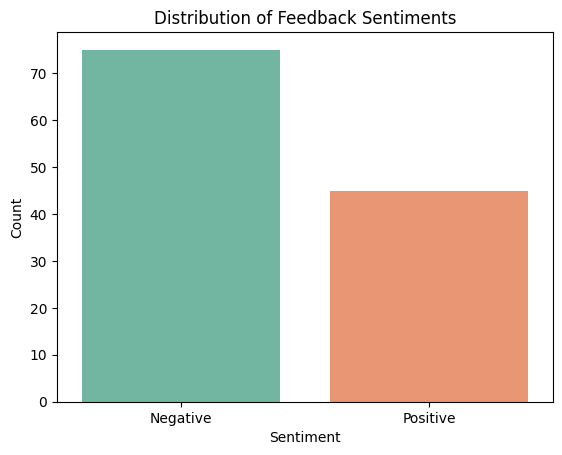

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from graphviz import Digraph
import seaborn as sns

# Step 3: Data Lineage Visualization
def visualize_data_lineage():
    relationships = [
        ("Customers", "CustomerID", "Transactions", "CustomerID"),
        ("Services", "ServiceID", "Transactions", "ServiceID"),
        ("Customers", "CustomerID", "Feedback", "CustomerID"),
        ("Services", "ServiceID", "Feedback", "ServiceID"),
        ("Services", "ProviderID", "Providers", "ProviderID")
    ]
    dot = Digraph(format='png', engine='dot')
    for source, source_key, target, target_key in relationships:
        dot.node(source, source, shape='box', style='filled', color='lightblue')
        dot.node(target, target, shape='box', style='filled', color='lightgreen')
        dot.edge(source, target, label=f"{source_key} -> {target_key}", color='black')
    dot.render(filename="data_lineage", cleanup=True)
    return dot

lineage_diagram = visualize_data_lineage()

# Step 4: Additional Analyses and Visualizations
def additional_analyses():
    # 1. Service Rating Analysis
    if not feedback_df.empty and not service_df.empty:
        service_rating = feedback_df.groupby('ServiceID')['Rating'].mean().reset_index()
        service_rating = service_rating.merge(service_df, on='ServiceID')
        sns.barplot(x='Name', y='Rating', data=service_rating, palette='coolwarm')
        plt.title("Average Rating per Service")
        plt.xlabel("Service")
        plt.ylabel("Average Rating")
        plt.xticks(rotation=45)
        plt.show()
    else:
        print("Feedback or service data is empty, skipping service rating analysis.")

    # 4. Feedback Sentiment Analysis
    if not feedback_df.empty:
        feedback_df['Sentiment'] = feedback_df['Rating'].apply(lambda x: 'Positive' if x >= 4 else 'Negative')
        sns.countplot(x='Sentiment', data=feedback_df, palette='Set2')
        plt.title("Distribution of Feedback Sentiments")
        plt.xlabel("Sentiment")
        plt.ylabel("Count")
        plt.show()
    else:
        print("Feedback data is empty, skipping sentiment analysis.")

additional_analyses()